In [1]:
# All features: Final preprocessing list

# (1. current open minus previous close)

# 2. todays high - todays low
# 3. todays close - todays open


# should make data stationary. Use augmented dickey-fuller test to check for stationarity:
"""
from statsmodels.tsa.stattools import adfuller

# Assume `data` is a pandas DataFrame with 'Open' and 'Close' columns
data['Percent_Change'] = (data['Close'] - data['Open']) / data['Open']

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(data['Percent_Change'].dropna())

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")
"""

# 4. todays close - yesterday's close
# 5. todays open - todays low
# 6. todays open - todays high
# 7. todays close - todays low
# 8. todays close - todays high

# 4. month of year
# 5. week of year
# 6. day of year
# 7. day of month
# 8. day of week
# 9. hour of day (24h cycle)
# 10. Volume (normalized from 0 to 1)


# 11. Rolling window (SMA, EMA)
# 12. Fourier Transform
# 13. Wavelet Transform (discrete wavelet transform (adjust based on volatility: high volatility -> narrow the wavelet, low volatility -> widen the wavelet))
# ?? (Haar, Daubechies, Symlets, Coiflets, Biorthogonal, Reverse Biorthogonal, Discrete Meyer, Gaussian, Mexican Hat, Morlet, Complex Gaussian, Shannon, Frequency B-Spline, Complex Morlet, Generalized Morse, Complex Morlet, Paul, D4, D6, D8, D10, D12, D14, D16, D18, D20, D22, D24, D26, D28, D30, D32, D34, D36, D38, D40, D42, D44, D46, D48, D50, D52, D54, D56, D58, D60, D62, D64, D66, D68, D70, D72, D74, D76, D78, D80, D82, D84, D86, D88, D90, D92, D94, D96, D98, D100, D102, D104, D106, D108, D110, D112, D114, D116, D118, D120, D122, D124, D126, D128, D130, D132, D134, D136, D138, D140, D142, D144, D146, D148, D150, D152, D154, D156, D158, D160, D162, D164, D166, D168, D170, D172, D174, D176, D178, D180, D182, D184, D186, D188, D190, D192, D194, D196, D198, D200, D202, D204, D206, D208, D210, D212, D214, D216, D218, D220, D222, D224, D226, D228, D230, D232, D234, D236, D238, D240, D242, D244, D246, D248, D250, D252, D254, D256, D258, D260, D262, D264, D266, D268, D270, D272, D274, D276, D278, D280, D282, D284, D286, D288, D290, D292, D294, D)
# 14. Trading indicators (bullish or bearish divergence on the RSI, TD Sequential, Candlestick Patterns)


# Alle percentage price changes zwischen -1 und 1 normalisieren
# Volume normalisieren auf [0,1]


# Mit Github Copilot generiert:
# 14. Autocorrelation
# 15. Partial Autocorrelation
# 16. Cross-correlation
# 17. Cross-partial correlation
# 18. Cross-wavelet correlation
# 19. Cross-spectral density
# 20. Cross-wavelet coherence
# 21. Cross-wavelet phase
# 22. Cross-wavelet amplitude
# 23. Cross-wavelet phase difference
# 24. Cross-wavelet amplitude difference
# 25. Cross-wavelet phase lag
# 26. Cross-wavelet amplitude lag
# 27. Cross-wavelet coherence lag
# 28. Cross-wavelet phase difference lag
# 29. Cross-wavelet amplitude difference lag




## Getting the data

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from configuration import stock_ticker, start_date, end_date

In [3]:
stock_df = yf.download(stock_ticker, start=start_date, end=end_date)
stock_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,22.700001,23.000000,22.520000,22.950001,14.269997,16355800
2009-01-05,22.785000,22.945000,22.590000,22.719999,14.126986,20237200
2009-01-06,22.850000,22.985001,22.230000,22.355000,13.900027,21307800
2009-01-07,22.110001,22.590000,22.110001,22.465000,13.968429,21581000
2009-01-08,22.420000,22.639999,22.280001,22.620001,14.064801,20087000


In [4]:
features_df = pd.DataFrame(index=stock_df.index)
features_df.head()

""
Date
2009-01-02
2009-01-05
2009-01-06
2009-01-07
2009-01-08


## Helper Functions

In [5]:
# Standardize with zero mean and 1 variance

def adjust_to_three_sigma(feature_list):
    percentile_1st = np.percentile(feature_list, 0.3)
    percentile_99th = np.percentile(feature_list, 99.7)
    feature_list_capped = [max(min(x, percentile_99th), percentile_1st) for x in feature_list]
    plt.plot(feature_list_capped)
    return feature_list_capped

def adjust_top_one_pct(feature_list):
    percentile_1st = np.percentile(feature_list, 1)
    percentile_99th = np.percentile(feature_list, 99)
    feature_list_capped = [max(min(x, percentile_99th), percentile_1st) for x in feature_list]
    return feature_list_capped

def standardize_and_plot(feature_list):
    feature_list = np.array(feature_list)
    mean = np.mean(feature_list)
    std_dev = np.std(feature_list)
    feature_list_standardized = (feature_list - mean) / std_dev
    print("Standardized mean:", np.mean(feature_list_standardized))
    print("Standardized variance:", np.var(feature_list_standardized))
    plt.hist(feature_list_standardized, bins='auto')
    plt.title('Standardized to zero mean and unit variance')
    plt.xlabel('Standardized Value')
    plt.ylabel('Frequency')
    plt.show()
    return feature_list_standardized

def log_and_plot(list):
    log_list = []
    for val in list:
        if val > 0:
            log_list.append(np.log(val))
        elif val == 0:
            log_list.append(0)
        else:
            log_list.append(-np.log(val))
    plt.hist(log_list, bins='auto')
    plt.title('Distribution of t_open_y_close_adjusted Values')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    return log_list
    

In [28]:
print(np.log())

-18.420680743952367


## Features

### 1. Current open minus previous close [%] | (capture price jumps between candles)


[0, -0.7189582136911891, 0.5721878170956705, -1.095946933131794, -0.20031193406763212, -0.022109053623730383, -0.31389998752953185, 0.16007248012113517, -1.1812822634170623, -0.11731402701453747, 1.2453895478000212, -0.1368644458991265, 1.2126876045027304, -1.5015049945304169, -1.0899754583674706, 0.23696320453366818, 0.5809900234537843, 1.5462684990359812, -0.3647967286492632, -0.25258464357894467, -1.1938251911456164, 0.6155263049285001, 0.06924926017591637, -0.4245290063631667, 0.0937009061000934, -0.5281275459600954, -0.7090594233523119, 0.7130585900758212, 3.343835843974724, -0.42802124199463554, -1.9384230415030377, 0.4225359427773898, 1.0074983648105442, -0.7621201435841504, 0.4201687780920975, 1.4967951195802003, -0.278687279969447, 0.9440678214836877, -0.26783689108579456, -0.9791866000559177, 0.302350090033202, 1.0816331422611851, -1.434683366201052, 0.7926104725286355, 0.9718697773524049, 2.270970498361895, 0.0, 0.025277069263604356, 0.5876632653528254, 0.5822364305243886, 0

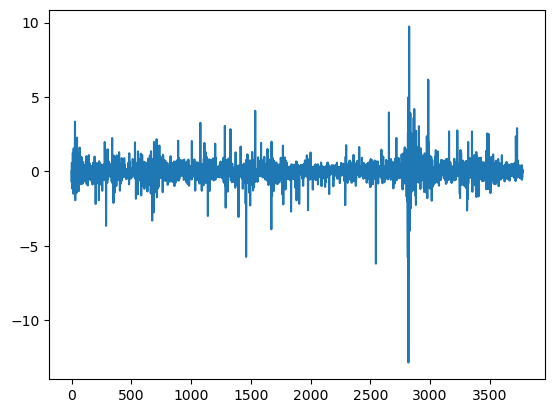

In [6]:
# 1. Current open minus previous close [%]

curr_open_prev_close = [(stock_df['Open'].iloc[i] - stock_df['Close'].iloc[i-1]) * 100 / stock_df['Close'].iloc[i-1] for i in range(1,len(stock_df))]
curr_open_prev_close = [0] + curr_open_prev_close
print(curr_open_prev_close)
plt.plot(curr_open_prev_close)

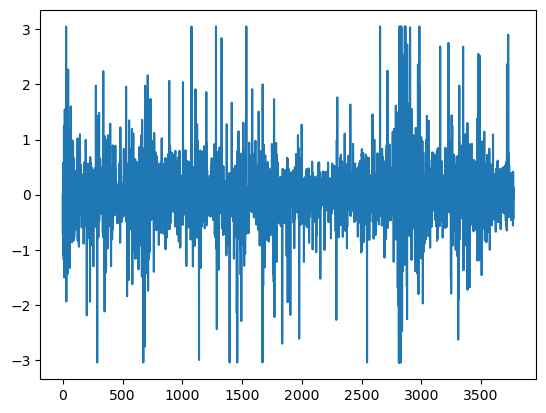

In [7]:
# Three sigma adjusted values
curr_open_prev_close_adjusted = adjust_to_three_sigma(curr_open_prev_close)

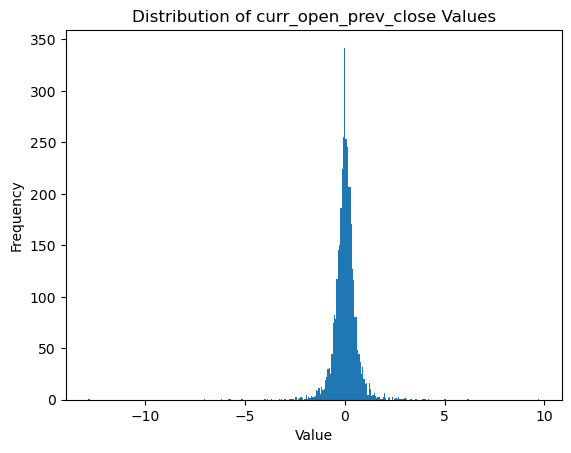

In [8]:
# Histogram
plt.hist(curr_open_prev_close, bins='auto')
plt.title('Distribution of curr_open_prev_close Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

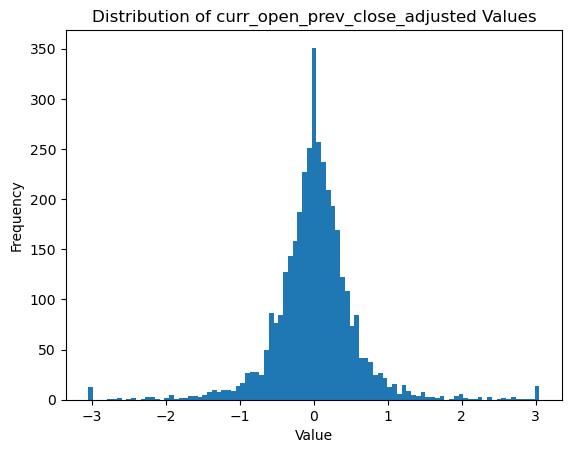

In [9]:
# Three sigma histogram
plt.hist(curr_open_prev_close_adjusted, bins='auto')
plt.title('Distribution of curr_open_prev_close_adjusted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Standardized mean: 1.8827311493378383e-17
Standardized variance: 0.9999999999999999


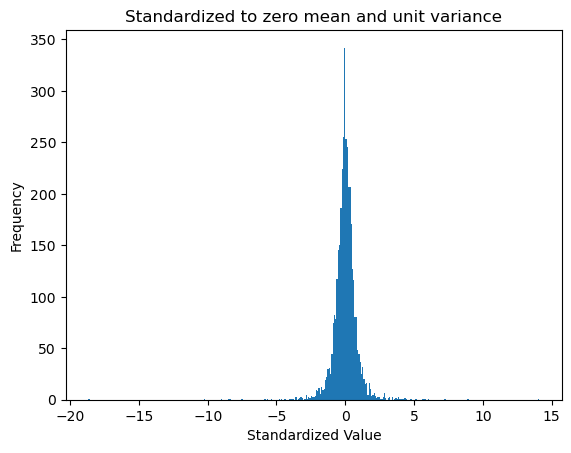

In [10]:
# Standardized histogram
curr_open_prev_close_std = standardize_and_plot(curr_open_prev_close)

/var/folders/72/xqxvrz7s4n7grqqwprj1mrc80000gn/T/ipykernel_2139/571106637.py:38: RuntimeWarning: invalid value encountered in log
  log_list.append(-np.log(val))


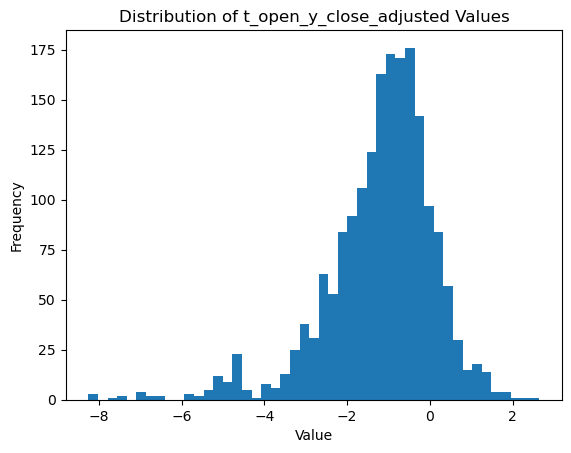

In [11]:
# Log of standardized histogram
curr_open_prev_close_log = log_and_plot(curr_open_prev_close_std)

In [12]:
features_df['curr_open_prev_close_log'] = curr_open_prev_close_log
features_df.head()

,curr_open_prev_close_log
Date,
2009-01-02,NaN
2009-01-05,NaN
2009-01-06,-0.218299
2009-01-07,NaN
2009-01-08,NaN


### 2. Today's close minus today's open [%] | (daily movement)

[1.1013215488880326, -0.2852777462932477, -2.166305605993866, 1.6056062073111061, 0.8920640600306078, -1.3928832069231654, -1.6419243303387188, 0.502285900765439, -2.0229909611844468, 1.8557691359894333, -0.13667738315600061, -2.0557280408313776, -0.25345761862697275, 1.1257025072867517, -1.0551013993901135, 1.7257672704559988, 0.11553385667314672, -0.31818043101917615, -0.34325291363865984, -1.657452644492421, 0.07107935239254094, 1.9294110466452206, -2.1914578585494366, 1.1132103088983096, 1.9190257514833173, -2.3314827531124744, -3.1897172247708525, 0.7568393071779453, 4.079713485388145, -0.7918603682736295, -0.9302361066951308, -0.23375053056216405, 0.44072981679188833, -0.3025391306077025, -2.1617859025567427, 0.79588048425223, -1.327432960069251, -3.9747503968774605, -0.26855618361881783, -1.878868039297511, -2.461691807159346, 1.2229287700288614, -3.345253775269325, 2.4901622811148796, -1.8490363492921602, -1.1859732728628913, 1.0469863355712046, 3.18342158474738, 0.340796941110

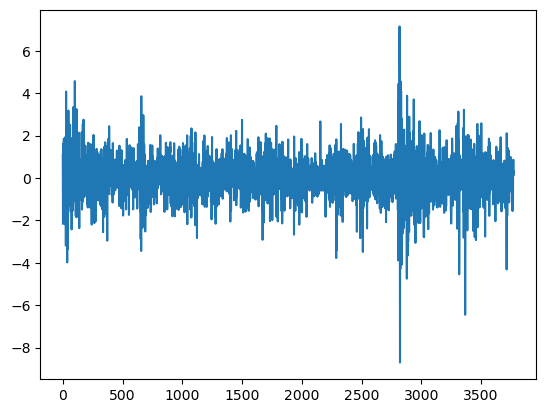

In [13]:
# 2. Today's close minus today's open [%] | (daily movement)

t_close_t_open = [(stock_df['Close'].iloc[i] - stock_df['Open'].iloc[i]) * 100 / stock_df['Open'].iloc[i] for i in range(len(stock_df))]
print(t_close_t_open)
plt.plot(t_close_t_open)

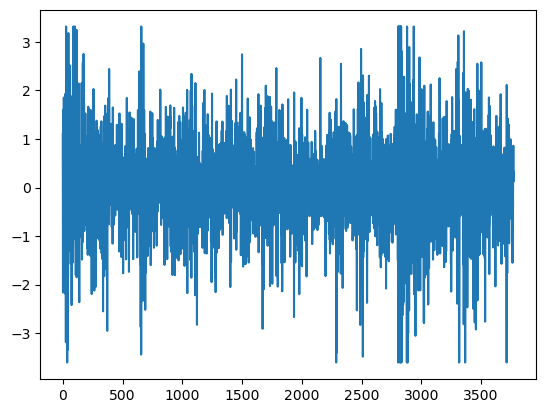

In [14]:
# Three sigma adjusted values
t_close_t_open_adjusted = adjust_to_three_sigma(t_close_t_open)

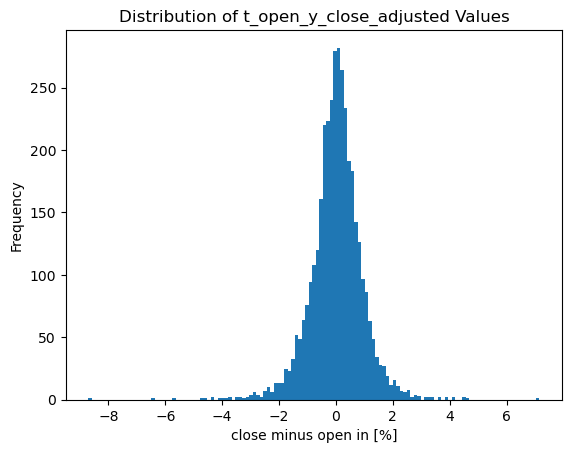

In [15]:
# Histogram
plt.hist(t_close_t_open, bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('close minus open in [%]')
plt.ylabel('Frequency')
plt.show()

Standardized mean: 0.0
Standardized variance: 1.0


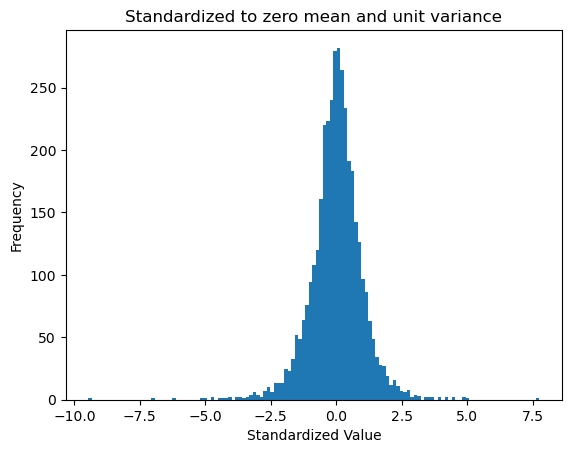

In [16]:
# Standardized histogram
t_close_t_open_std = standardize_and_plot(t_close_t_open)

/var/folders/72/xqxvrz7s4n7grqqwprj1mrc80000gn/T/ipykernel_2139/571106637.py:38: RuntimeWarning: invalid value encountered in log
  log_list.append(-np.log(val))


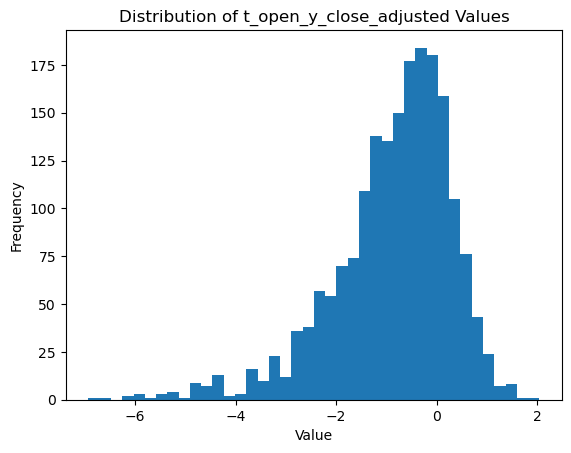

In [17]:
# Log of standardized histogram
t_close_t_open_log = log_and_plot(t_close_t_open_std)

In [18]:
features_df['t_close_t_open_log'] = t_close_t_open_log
features_df.head()

,curr_open_prev_close_log,t_close_t_open_log
Date,,
2009-01-02,NaN,0.166068
2009-01-05,NaN,NaN
2009-01-06,-0.218299,NaN
2009-01-07,NaN,0.547075
2009-01-08,NaN,-0.047670


### 3. Today's high minus today's low [%] | (volatility at timestep t)

[2.131436645112724, 1.5714897735211377, 3.396316165822474, 2.170961234671336, 1.6157930516524204, 2.282482082560911, 2.6660535328911346, 1.6047702431917665, 2.9808334702815955, 2.3349005380702277, 2.323437527423346, 3.7779824895791956, 3.059774478643712, 2.198582321393932, 2.6467719869422806, 2.991458139085206, 2.1627914073855377, 1.7341040462427746, 2.653441444001098, 2.7039773310285495, 2.335663975956292, 3.62077292600823, 3.0037854645954942, 2.338342986887035, 2.414436903377903, 3.238096691313244, 5.039728539012573, 1.5380885795821677, 5.456700246258384, 1.5793144039707778, 1.7672008111894675, 1.869824652135725, 2.4367406468861326, 2.5719682046161076, 3.029581376996574, 2.3939373527048953, 2.6565439656981265, 4.291641570993044, 2.076638162532506, 2.7763814196701473, 3.9731707487505044, 3.8105034408392413, 5.341880537819352, 2.9133875454234346, 2.943453145165238, 2.6390597743791715, 2.304741468534413, 3.8373626296924415, 2.522880163404533, 2.1643954590629257, 2.0823088693674574, 3.04

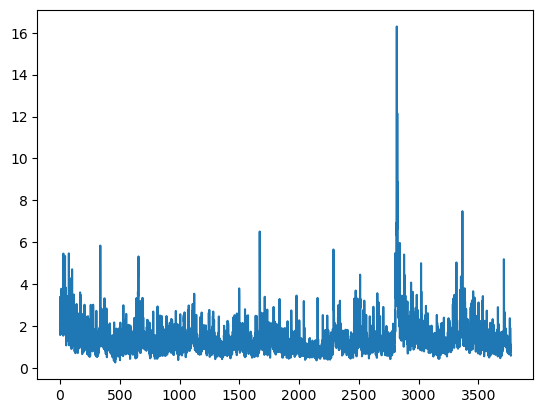

In [19]:
# 3. Today's high minus today's low [%] | (daily volatility)

t_high_t_low = [(stock_df['High'].iloc[i] - stock_df['Low'].iloc[i]) * 100 / stock_df['Low'].iloc[i] for i in range(len(stock_df))]
print(t_high_t_low)
plt.plot(t_high_t_low)

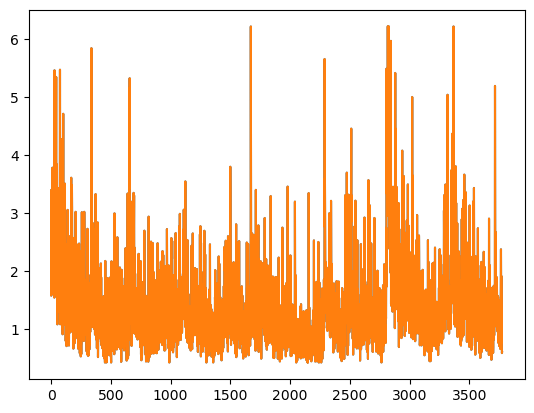

In [20]:
# Three sigma adjusted values
t_high_t_low_adjusted = adjust_to_three_sigma(t_high_t_low)
plt.plot(t_high_t_low_adjusted)

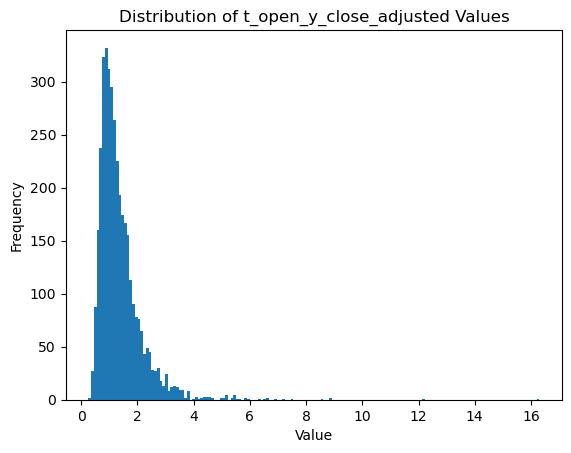

In [21]:
# Histogram
plt.hist(t_high_t_low, bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Standardized mean: -3.0123698389405415e-17
Standardized variance: 1.0


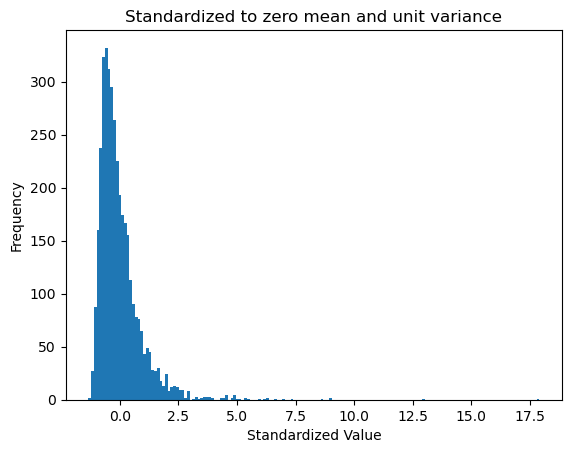

In [22]:
# Standardized histogram
t_high_t_low_std = standardize_and_plot(t_high_t_low)

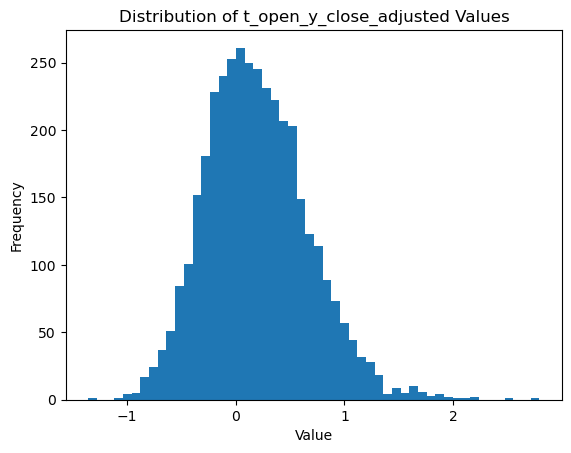

In [24]:
# Log of standardized histogram
t_high_t_low_log = log_and_plot(t_high_t_low)

In [ ]:
features_df['t_high_t_low_log'] = t_high_t_low_log
features_df.head()

### 4. Bid-Ask Spread

### 5. Volume

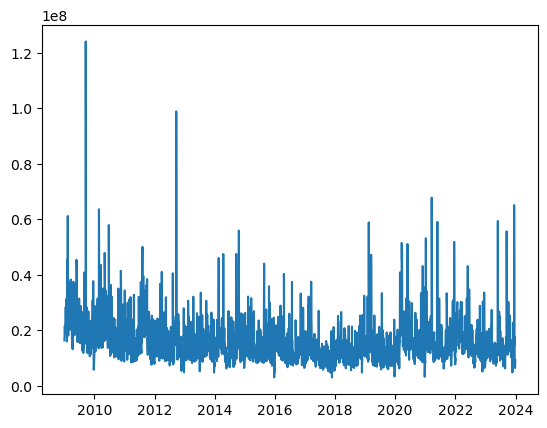

In [29]:
volume = stock_df['Volume']
plt.plot(volume)

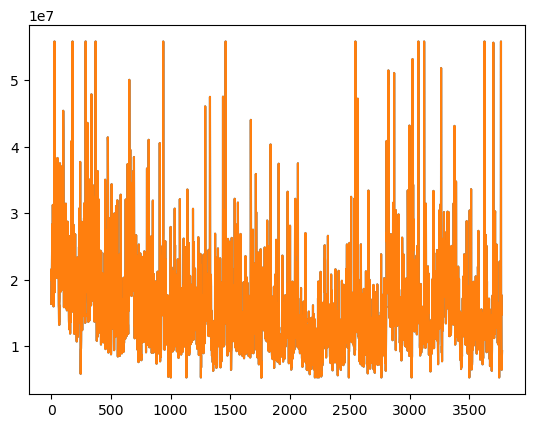

In [30]:
volume_adjusted = adjust_to_three_sigma(volume)
plt.plot(volume_adjusted)

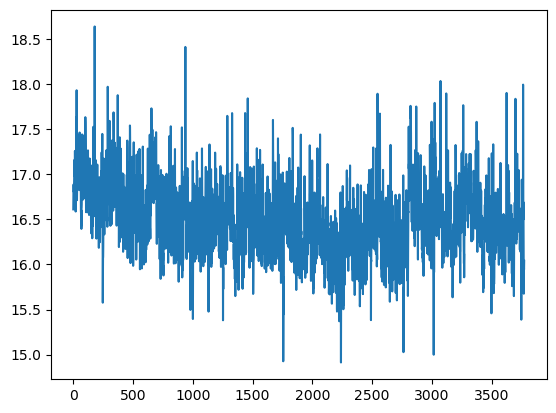

In [31]:
# Use log for volume
log_volume = [np.log(value) for value in stock_df['Volume']]
plt.plot(log_volume)

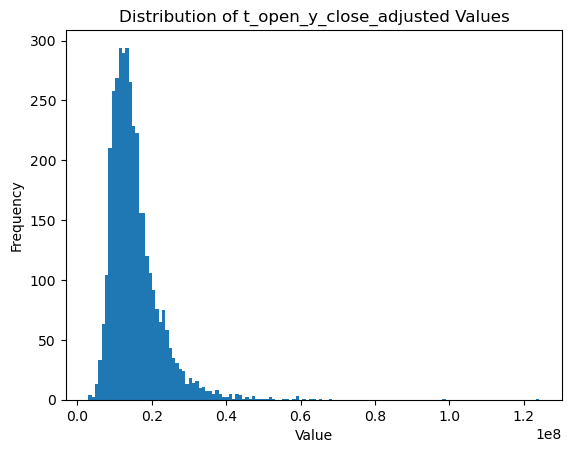

In [33]:
# Histogram
plt.hist(volume, bins='auto')
plt.title('Distribution of t_open_y_close_adjusted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

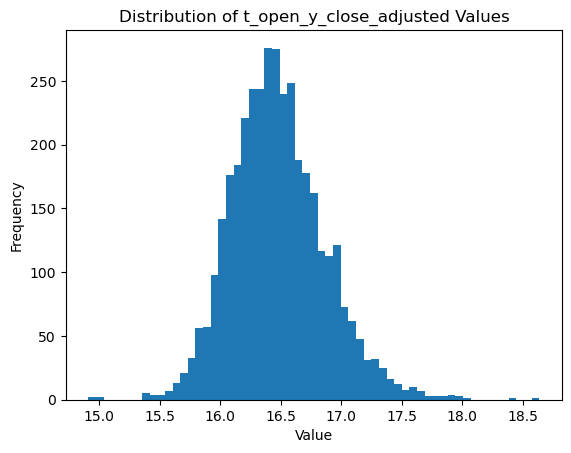

[16.61009313246332,
 16.82303305289274,
 16.87458376082893,
 16.8873238559236,
 16.815583397616685,
 16.80131370044038,
 16.83446118719404,
 16.933566653294523,
 17.113330641277646,
 17.149912651682964,
 17.160250456547697,
 17.15949540667501,
 16.98522134840797,
 16.97205981352471,
 17.257715516925135,
 17.04278303209972,
 16.80234334833123,
 16.73671323203069,
 16.87226266934421,
 16.933787844276143,
 16.586022124408856,
 16.70310067289856,
 16.72279405833315,
 16.91198369298621,
 16.74523122592435,
 16.795540187790973,
 17.632959112872918,
 16.87127433629909,
 17.9300857604471,
 16.939477722408455,
 17.08967727616325,
 16.71187543231905,
 16.801848845876396,
 17.22246467113879,
 16.97086707545339,
 17.081880469360787,
 17.086956062293915,
 16.875812602167564,
 17.38357739186146,
 17.255896600984006,
 17.43355437230768,
 17.338435776904245,
 17.41185248491757,
 17.312090844058982,
 17.374492010686108,
 17.37602809182013,
 17.120710857291904,
 17.05315317972388,
 17.009962534121858,
 

In [35]:
log_and_plot(volume)

### 6. Month of year

In [36]:
# 6. Month of year

def month_of_year(month):
    radians = (month - 1) * (np.pi / 6)
    return [np.cos(radians), np.sin(radians)]

features_df['month_of_year'] = features_df.index.month.map(month_of_year)
features_df


,curr_open_prev_close_log,t_close_t_open_log,month_of_year
Date,,,
2009-01-02,NaN,0.166068,"[1.0, 0.0]"
2009-01-05,NaN,NaN,"[1.0, 0.0]"
2009-01-06,-0.218299,NaN,"[1.0, 0.0]"
2009-01-07,NaN,0.547075,"[1.0, 0.0]"
2009-01-08,NaN,-0.047670,"[1.0, 0.0]"
...,...,...,...
2023-12-22,-1.207072,-1.025814,"[0.8660254037844384, -0.5000000000000004]"
2023-12-26,NaN,-0.083476,"[0.8660254037844384, -0.5000000000000004]"
2023-12-27,-1.759928,-2.167326,"[0.8660254037844384, -0.5000000000000004]"


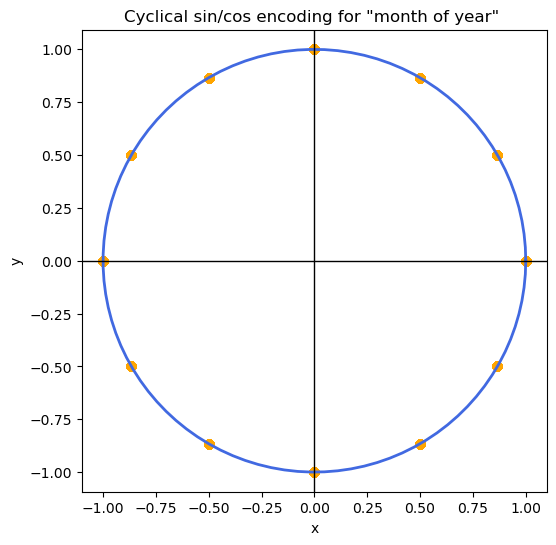

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of angles from 0 to 2pi
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate x and y coordinates of the points on the circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the circle
plt.figure(figsize=(6,6))
plt.plot(x, y, color='royalblue', linewidth=2)

x_coordinates = [val[0] for val in features_df['month_of_year']]
y_coordinates = [val[1] for val in features_df['month_of_year']]
plt.scatter(x_coordinates, y_coordinates, color='orange', marker='o')

# Add horizontal and vertical lines for the axes
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Set equal aspect ratio to ensure the circle is not distorted
plt.axis('equal')

# Set the limits of the plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Display the plot
plt.title('Cyclical sin/cos encoding for "month of year" ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 7. Week of year

In [38]:
# 7. Week of year

def week_of_year(week):
    radians = (week - 1) * (2 * np.pi / 52)
    return [np.cos(radians), np.sin(radians)]

features_df['week_of_year'] = features_df.index.isocalendar().week.map(week_of_year)
features_df

,curr_open_prev_close_log,t_close_t_open_log,month_of_year,week_of_year
Date,,,,
2009-01-02,NaN,0.166068,"[1.0, 0.0]","[1.0, 0.0]"
2009-01-05,NaN,NaN,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]"
2009-01-06,-0.218299,NaN,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]"
2009-01-07,NaN,0.547075,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]"
2009-01-08,NaN,-0.047670,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]"
...,...,...,...,...
2023-12-22,-1.207072,-1.025814,"[0.8660254037844384, -0.5000000000000004]","[0.9709418174260518, -0.23931566428755865]"
2023-12-26,NaN,-0.083476,"[0.8660254037844384, -0.5000000000000004]","[0.992708874098054, -0.12053668025532363]"
2023-12-27,-1.759928,-2.167326,"[0.8660254037844384, -0.5000000000000004]","[0.992708874098054, -0.12053668025532363]"


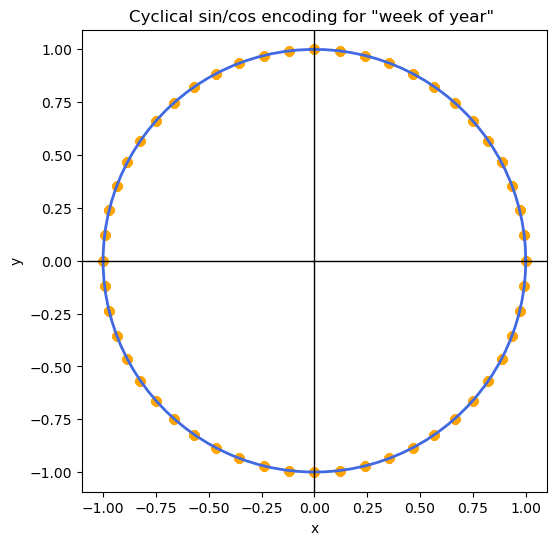

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of angles from 0 to 2pi
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate x and y coordinates of the points on the circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the circle
plt.figure(figsize=(6,6))
plt.plot(x, y, color='royalblue', linewidth=2)

x_coordinates = [val[0] for val in features_df['week_of_year']]
y_coordinates = [val[1] for val in features_df['week_of_year']]
plt.scatter(x_coordinates, y_coordinates, color='orange', marker='o')

# Add horizontal and vertical lines for the axes
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Set equal aspect ratio to ensure the circle is not distorted
plt.axis('equal')

# Set the limits of the plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Display the plot
plt.title('Cyclical sin/cos encoding for "week of year" ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [40]:
# Test for the week number
'''
test_df = features_df.copy()
test_df['week_number'] = test_df.index.isocalendar().week
test_df
'''

"\ntest_df = features_df.copy()\ntest_df['week_number'] = test_df.index.isocalendar().week\ntest_df\n"

### 8. Day of year (dont use for now because of leap year)

In [41]:
# 8. Day of year - leap year? => If we use this feature, remove the 29th of February from the data set

'''
def day_of_year(day):
    radians = (day - 1) * (2 * np.pi / 365.25)
    return [np.cos(radians), np.sin(radians)]

features_df['day_of_year'] = features_df.index.day.map(day_of_year)
features_df
'''

"\ndef day_of_year(day):\n    radians = (day - 1) * (2 * np.pi / 365.25)\n    return [np.cos(radians), np.sin(radians)]\n\nfeatures_df['day_of_year'] = features_df.index.day.map(day_of_year)\nfeatures_df\n"

### 9. Day of month

In [42]:
# 9. Day of month

def day_of_month(day):
    radians = (day - 1) * (2 * np.pi / 31)
    return [np.cos(radians), np.sin(radians)]

features_df['day_of_month'] = features_df.index.day.map(day_of_month)
features_df

,curr_open_prev_close_log,t_close_t_open_log,month_of_year,week_of_year,day_of_month
Date,,,,,
2009-01-02,NaN,0.166068,"[1.0, 0.0]","[1.0, 0.0]","[0.9795299412524945, 0.20129852008866006]"
2009-01-05,NaN,NaN,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.6889669190756866, 0.72479278722912]"
2009-01-06,-0.218299,NaN,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.5289640103269624, 0.8486442574947509]"
2009-01-07,NaN,0.547075,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.3473052528448203, 0.9377521321470804]"
2009-01-08,NaN,-0.047670,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.1514277775045767, 0.9884683243281114]"
...,...,...,...,...,...
2023-12-22,-1.207072,-1.025814,"[0.8660254037844384, -0.5000000000000004]","[0.9709418174260518, -0.23931566428755865]","[-0.44039415155763423, -0.8978045395707417]"
2023-12-26,NaN,-0.083476,"[0.8660254037844384, -0.5000000000000004]","[0.992708874098054, -0.12053668025532363]","[0.3473052528448203, -0.9377521321470804]"
2023-12-27,-1.759928,-2.167326,"[0.8660254037844384, -0.5000000000000004]","[0.992708874098054, -0.12053668025532363]","[0.5289640103269624, -0.848644257494751]"


In [43]:
for day in set(features_df.index.day):
    print(day)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


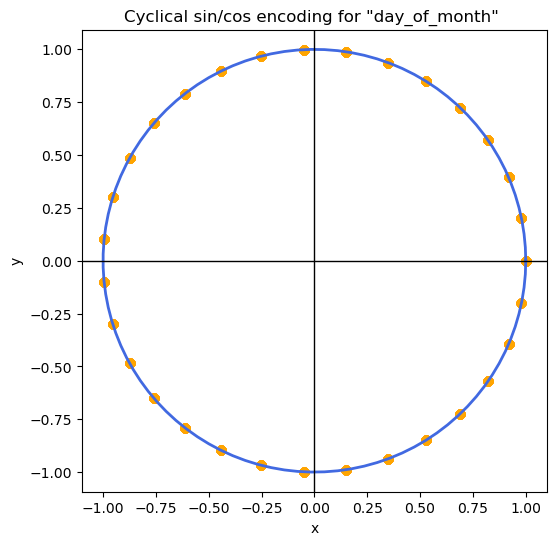

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of angles from 0 to 2pi
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate x and y coordinates of the points on the circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the circle
plt.figure(figsize=(6,6))
plt.plot(x, y, color='royalblue', linewidth=2)

x_coordinates = [val[0] for val in features_df['day_of_month']]
y_coordinates = [val[1] for val in features_df['day_of_month']]
plt.scatter(x_coordinates, y_coordinates, color='orange', marker='o')

# Add horizontal and vertical lines for the axes
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Set equal aspect ratio to ensure the circle is not distorted
plt.axis('equal')

# Set the limits of the plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Display the plot
plt.title('Cyclical sin/cos encoding for "day_of_month" ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 10. Day of week

In [45]:
# 10. Day of week

def day_of_week(day):
    radians = (day - 1) * (2 * np.pi / 7)
    return [np.cos(radians), np.sin(radians)]

features_df['day_of_week'] = features_df.index.isocalendar().day.map(day_of_week)
features_df

,curr_open_prev_close_log,t_close_t_open_log,month_of_year,week_of_year,day_of_month,day_of_week
Date,,,,,,
2009-01-02,NaN,0.166068,"[1.0, 0.0]","[1.0, 0.0]","[0.9795299412524945, 0.20129852008866006]","[-0.9009688679024191, -0.433883739117558]"
2009-01-05,NaN,NaN,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.6889669190756866, 0.72479278722912]","[1.0, 0.0]"
2009-01-06,-0.218299,NaN,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.5289640103269624, 0.8486442574947509]","[0.6234898018587336, 0.7818314824680298]"
2009-01-07,NaN,0.547075,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.3473052528448203, 0.9377521321470804]","[-0.22252093395631434, 0.9749279121818236]"
2009-01-08,NaN,-0.047670,"[1.0, 0.0]","[0.992708874098054, 0.12053668025532305]","[0.1514277775045767, 0.9884683243281114]","[-0.900968867902419, 0.43388373911755823]"
...,...,...,...,...,...,...
2023-12-22,-1.207072,-1.025814,"[0.8660254037844384, -0.5000000000000004]","[0.9709418174260518, -0.23931566428755865]","[-0.44039415155763423, -0.8978045395707417]","[-0.9009688679024191, -0.433883739117558]"
2023-12-26,NaN,-0.083476,"[0.8660254037844384, -0.5000000000000004]","[0.992708874098054, -0.12053668025532363]","[0.3473052528448203, -0.9377521321470804]","[0.6234898018587336, 0.7818314824680298]"
2023-12-27,-1.759928,-2.167326,"[0.8660254037844384, -0.5000000000000004]","[0.992708874098054, -0.12053668025532363]","[0.5289640103269624, -0.848644257494751]","[-0.22252093395631434, 0.9749279121818236]"


In [46]:
print(features_df.index.isocalendar().day)

Date
2009-01-02    5
2009-01-05    1
2009-01-06    2
2009-01-07    3
2009-01-08    4
             ..
2023-12-22    5
2023-12-26    2
2023-12-27    3
2023-12-28    4
2023-12-29    5
Name: day, Length: 3774, dtype: UInt32


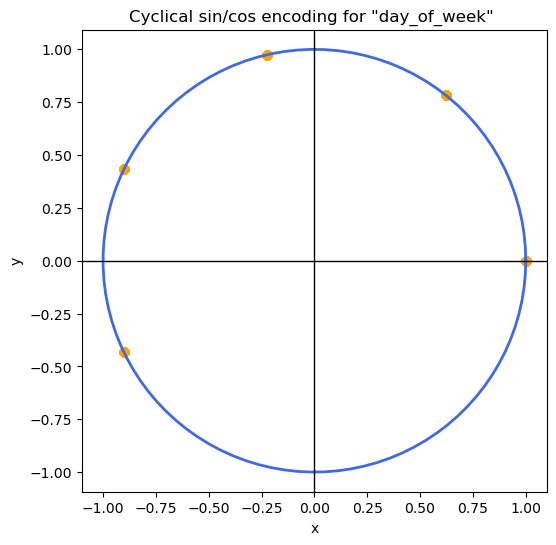

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of angles from 0 to 2pi
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate x and y coordinates of the points on the circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the circle
plt.figure(figsize=(6,6))
plt.plot(x, y, color='royalblue', linewidth=2)

x_coordinates = [val[0] for val in features_df['day_of_week']]
y_coordinates = [val[1] for val in features_df['day_of_week']]
plt.scatter(x_coordinates, y_coordinates, color='orange', marker='o')

# Add horizontal and vertical lines for the axes
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Set equal aspect ratio to ensure the circle is not distorted
plt.axis('equal')

# Set the limits of the plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Display the plot
plt.title('Cyclical sin/cos encoding for "day_of_week" ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 11. Hour of day

In [48]:
# 11. Hour of day - CURRENTLY: daily resolution on public data - implement later with Energy data

'''
def hour_of_day(hour):
    radians = (hour - 1) * (2 * np.pi / 7)
    return [np.cos(radians), np.sin(radians)]

features_df['hour_of_day'] = features_df.index.hour.map(hour_of_day)
features_df
'''

"\ndef hour_of_day(hour):\n    radians = (hour - 1) * (2 * np.pi / 7)\n    return [np.cos(radians), np.sin(radians)]\n\nfeatures_df['hour_of_day'] = features_df.index.hour.map(hour_of_day)\nfeatures_df\n"

### Create tensor from features